## Convolutional Neural Nets Using Keras and TensorFlow

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

np.random.seed(12345)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


Using TensorFlow backend.


### Load Data

In [3]:
data = np.load("../datasets/nigeria_class/data.npz")

# training dataset
X_train = data['x_train']
Y_train = data['y_train']

#validation dataset
X_test = data['x_test']
Y_test = data['y_test']

#### Inspect Data

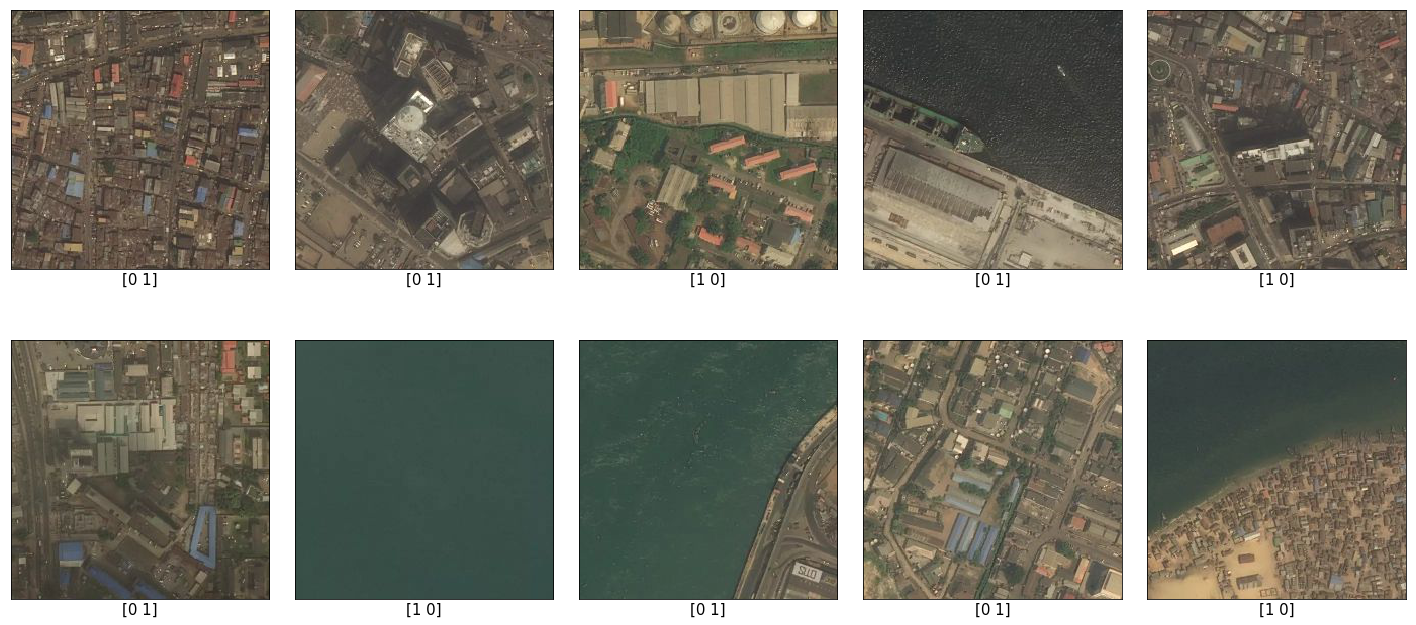

In [4]:
sample_X_train = X_train[0:10,:,:]
sample_Y_train = Y_train[0:10:,]

fig = plt.subplots(figsize=(25,25))
plt.subplots_adjust(bottom=0, top=0.35,wspace=0.1, hspace=0.1)
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample_X_train[i])
    plt.xlabel(sample_Y_train[i], fontsize=15)

### Normalization

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

### Reshape

In [6]:
# tr_num, tr_cols, tr_rows, tr_chn= X_train.shape
# te_num, te_cols, te_rows, te_chn= X_test.shape

# X_train = X_train.reshape(tr_num, tr_cols*tr_rows*tr_chn)
# X_test = X_test.reshape(te_num, te_cols*te_rows*te_chn)

In [7]:
X_train.shape, X_test.shape

((209, 256, 256, 3), (53, 256, 256, 3))

In [8]:
Y_train.shape

(209, 2)

### Label Encoding

In [9]:
#Y_train = to_categorical(Y_train, num_classes = 2)
#Y_test = to_categorical(Y_test, num_classes = 2)

### Set Parameters

####  Check Keras for data format

In [12]:
import json
from pprint import pprint

with open("../.keras/keras.json") as f:
    keras_json = json.load(f)
pprint(keras_json)

{'backend': 'tensorflow'}


In [13]:
tr_num, tr_cols, tr_rows, tr_chn= X_train.shape
print(X_train.shape)

(209, 256, 256, 3)


In [14]:
input_shape = (tr_cols, tr_rows, tr_chn)

epochs = 30

batch_size = 5
num_classes = 2

steps_per_epoch = int(X_train.shape[0]/batch_size)

In [15]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(5,5), padding = 'Same',
                activation ='relu', input_shape =input_shape))

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same',
                activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Conv2D(filters=64, kernel_size=(3,3), padding ='Same',
                activation ='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'Same',
                activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

### Set optimizer

In [16]:
optimizer = Adam(lr=1e-4)

model.compile(loss='categorical_crossentropy', 
              optimizer = optimizer, 
              metrics=["accuracy"])

#### Learning Rate Reduction

With the ReduceLROnPlateau function from Keras.callbacks, reduce the Learning Rate by half if the accuracy is not improved after 5 epochs.

In [17]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=5, 
                                           verbose=1, 
                                           factor =0.5,
                                           min_lr =0.00001)

Data Agumentation to prevent overfitting

In [18]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10,
                            featurewise_center=False, #default
                            samplewise_center=False, #default
                            featurewise_std_normalization=False, #default
                            samplewise_std_normalization=False, 
                            zca_whitening=False,
                            horizontal_flip=False,
                            vertical_flip=False)

In [19]:
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                           steps_per_epoch=steps_per_epoch,
                           epochs=epochs,
                           verbose=2,
                           validation_data=(X_test,Y_test),
                           callbacks=[learning_rate_reduction])

Epoch 1/30
 - 27s - loss: 0.9099 - acc: 0.4622 - val_loss: 0.6912 - val_acc: 0.5283
Epoch 2/30
 - 24s - loss: 0.6909 - acc: 0.5390 - val_loss: 0.6776 - val_acc: 0.5660
Epoch 3/30
 - 24s - loss: 0.6793 - acc: 0.5890 - val_loss: 0.6626 - val_acc: 0.6415
Epoch 4/30
 - 24s - loss: 0.6381 - acc: 0.6622 - val_loss: 0.6936 - val_acc: 0.6038
Epoch 5/30
 - 24s - loss: 0.6894 - acc: 0.5585 - val_loss: 0.6346 - val_acc: 0.6792
Epoch 6/30
 - 24s - loss: 0.6822 - acc: 0.5597 - val_loss: 0.6173 - val_acc: 0.6038
Epoch 7/30
 - 24s - loss: 0.6623 - acc: 0.5597 - val_loss: 0.6931 - val_acc: 0.4717
Epoch 8/30
 - 24s - loss: 0.6934 - acc: 0.4963 - val_loss: 0.6889 - val_acc: 0.4906
Epoch 9/30
 - 24s - loss: 0.6829 - acc: 0.5488 - val_loss: 0.6887 - val_acc: 0.4717
Epoch 10/30
 - 24s - loss: 0.6893 - acc: 0.5330 - val_loss: 0.6868 - val_acc: 0.4906

Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 11/30
 - 24s - loss: 0.6910 - acc: 0.5293 - val_loss: 0.6828 - val_acc: 

In [20]:
final_loss, final_acc = model.evaluate(X_test, Y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.5721, final accuracy: 0.6415


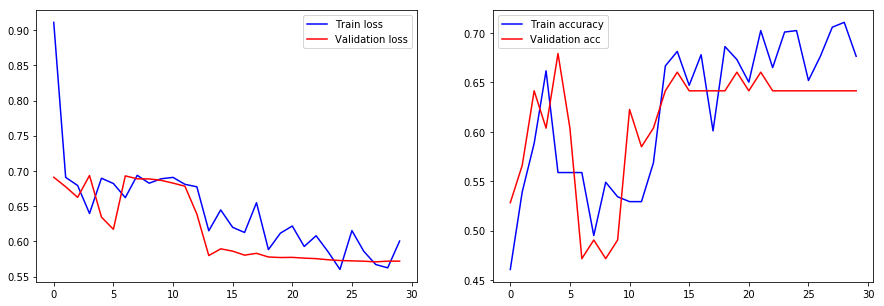

In [22]:

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(hist.history['loss'], color='b', label="Train loss")
ax[0].plot(hist.history['val_loss'], color='r',  label="Validation loss")

ax[1].plot(hist.history['acc'], color='b', label="Train accuracy")
ax[1].plot(hist.history['val_acc'], color='r',label="Validation acc")
ax[0].legend()
ax[1].legend()
plt.show()

plt.show()

### Prediction

In [32]:
prediction = model.predict(X_test)

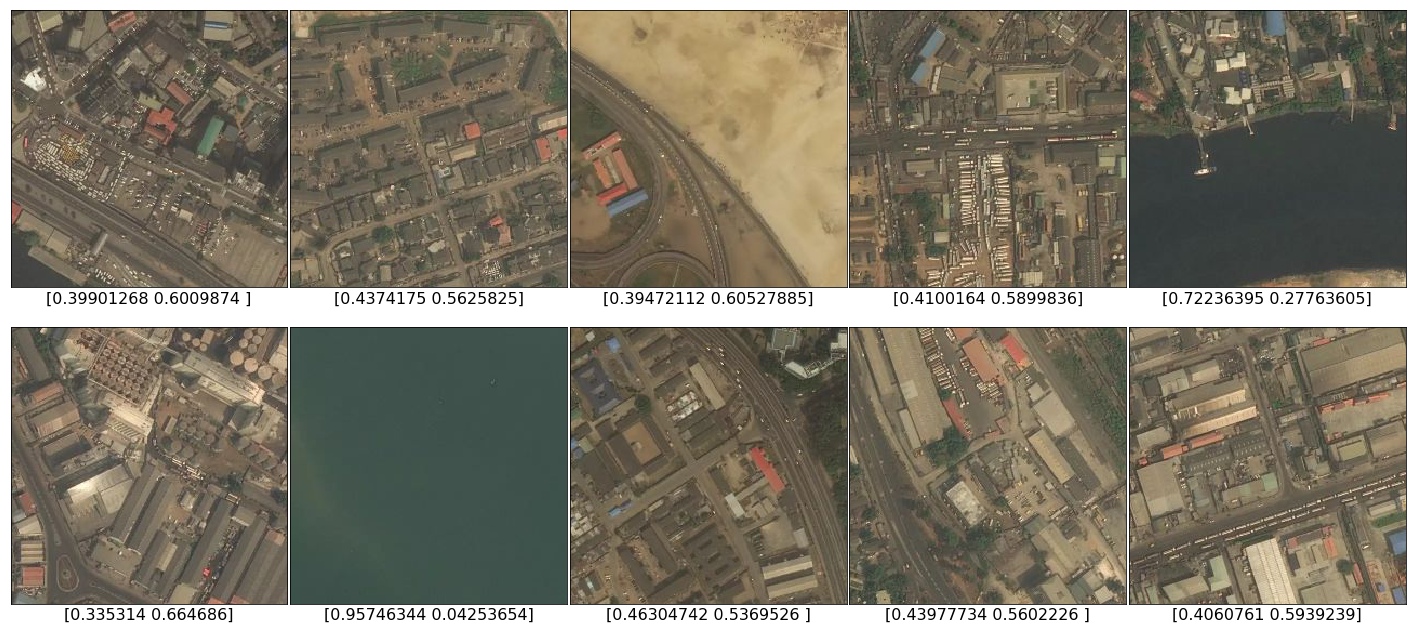

In [33]:
x_test_d  = data['x_test']
sample_test_data= X_test[1:11,:,:]
sample_test_prediction= prediction[1:11:,]

plt.figure(figsize=(25,25))
plt.subplots_adjust(bottom=0, top=0.35, wspace=0.01, hspace=0.01)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample_test_data[i])
    plt.xlabel(sample_test_prediction[i], fontsize=16)